# 6. Plot Hubble diagram

Loads `runs/<run>/distance_process.csv` and plots **μ_obs vs log(z)** (redshift on a log scale); optionally overlays the theoretical μ_th(z) curve for the same FlatLambdaCDM cosmology. Reports combined H₀ (or residual statistics) and saves the figure as `runs/<run>/hubble_diagram.png`.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

project_root = Path.cwd().parent
print(f"Project root: {project_root}")

Project root: /Users/david/Code/msc


In [2]:
run_name = input("Enter the run name: ").strip()
run_folder = project_root / "runs" / run_name
distance_process_path = run_folder / "distance_process.csv"

if not distance_process_path.exists():
    raise FileNotFoundError(f"No distance_process.csv found at {distance_process_path}")

df = pd.read_csv(distance_process_path)
print(df.head())

# ztf_cleansed_path = project_root / "ztf_cleansed.csv"
# ztf_df = pd.read_csv(ztf_cleansed_path)
# z_from_ztf = df["ztf_id"].map(ztf_df.set_index("ZTFID")["redshift"])
# df["host_redshift"] = z_from_ztf.fillna(df["host_redshift"])
# df["host_redshift"] = pd.to_numeric(df["host_redshift"], errors="coerce")

# Filter to z > 0 and sort by redshift for plotting
dfp = df[df["host_redshift"] > 0].sort_values("host_redshift").copy()
# Drop invalid rows for distance moduli or residuals
valid = np.isfinite(dfp["mu_obs"]) & np.isfinite(dfp["host_redshift"])
dfp = dfp.loc[valid]
if len(dfp) < len(df):
    print(f"Dropped {len(df) - len(dfp)} rows")
print(f"Loaded {len(dfp)} objects from {distance_process_path}")
dfp.head()

         ztf_id  host_redshift  ncall  ndof       chisq            t0  \
0  ZTF17aabtvsy       0.069222    168    19   62.182990  59864.109843   
1  ZTF17aabvong       0.034000    101    27  273.362718  60607.468247   
2  ZTF17aacldgo       0.072000    136    13   55.971224  59897.731667   
3  ZTF17aadlxmv       0.062000    113    24   60.420071  58878.408575   
4  ZTF18aaaonon       0.071419    133     9  109.025415  59707.229230   

         x0        x1         c         mB     mu_obs      mu_th     resid  
0  0.000826  6.473581  0.187504  18.342077  38.027115  37.470613  0.556502  
1  0.003010  0.027287  0.096425  16.938479  36.003383  35.871817  0.131567  
2  0.000464 -7.165863  0.007603  18.967717  37.300926  37.560273 -0.259347  
3  0.000929  0.734523  0.157706  18.215305  37.189250  37.220306 -0.031056  
4  0.000597 -3.140719 -0.041907  18.694612  37.744821  37.541799  0.203022  
Dropped 1 rows
Loaded 4995 objects from /Users/david/Code/msc/runs/run1/distance_process.csv


,ztf_id,host_redshift,ncall,ndof,chisq,t0,x0,x1,c,mB,mu_obs,mu_th,resid
4731,ZTF25abbgajq,0.002722,129,105,6.148192e+04,60885.325331,0.192660,-1.765466,0.068512,12.423023,31.323470,30.337626,0.985844
2042,ZTF21aamwpdf,0.002939,102,-2,5.329477e-07,59265.558925,0.000916,-7.910772,0.028171,18.230456,36.395618,30.504547,5.891072
3254,ZTF22abtknum,0.003309,128,40,1.701504e+04,59904.860615,0.072914,0.107326,0.516867,13.477970,31.250707,30.762652,0.488055
2114,ZTF21aaqytjr,0.003319,114,71,1.697223e+04,59319.935988,0.082584,-0.365415,0.085487,13.342763,32.386596,30.769221,1.617374
2352,ZTF21abiuvdk,0.003502,197,74,6.075237e+04,59410.574207,0.152022,-1.565838,0.146360,12.680235,31.367302,30.886072,0.481230


Saved to /Users/david/Code/msc/runs/run1/hubble_diagram.png


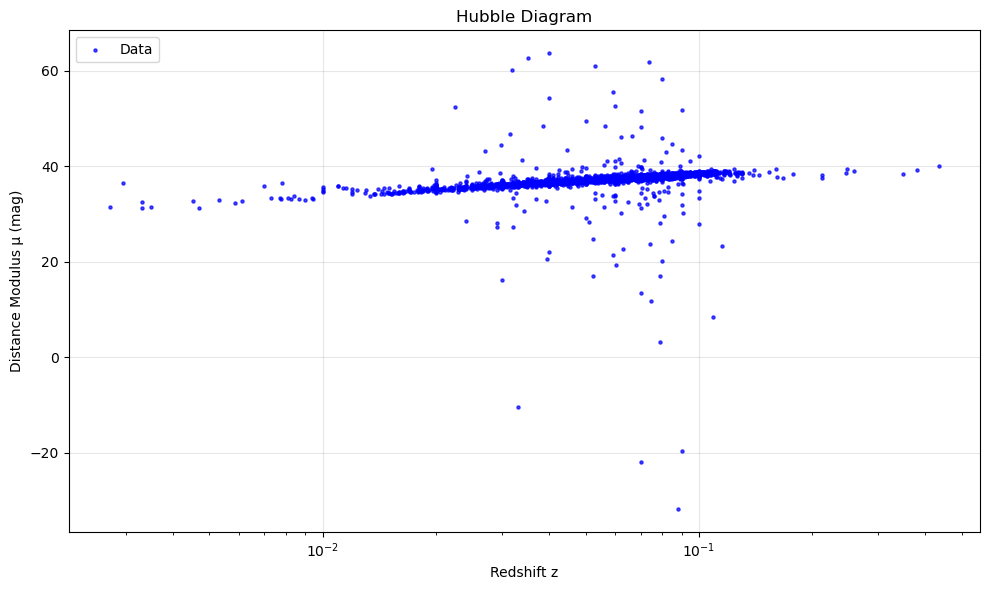

Saved to /Users/david/Code/msc/runs/run1/hubble_residuals.png


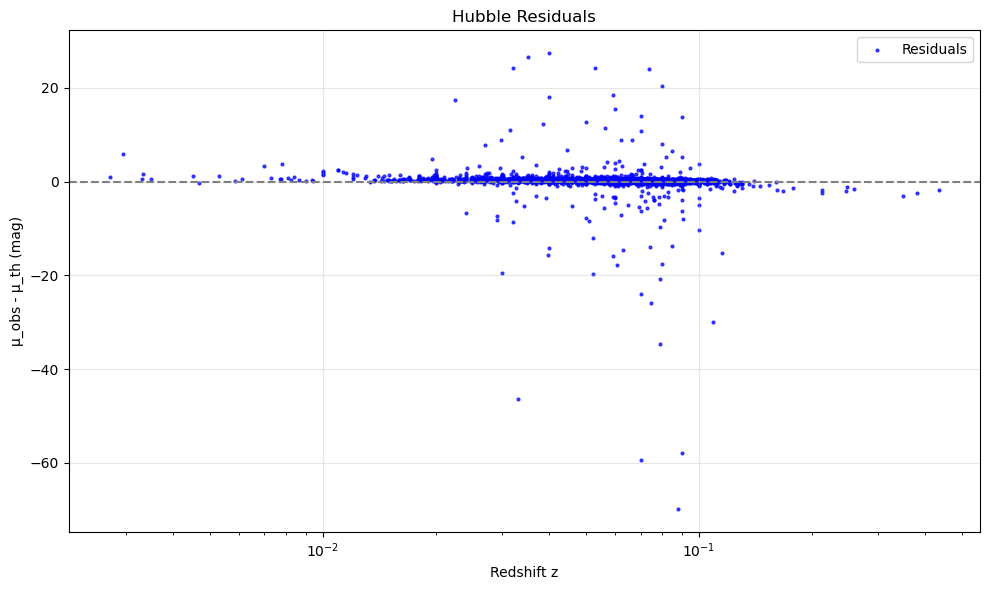

In [3]:
z_data = dfp["host_redshift"].to_numpy()
mu_obs = dfp["mu_obs"].to_numpy()

# Hubble diagram (data only; no theory curve for now)
plt.figure(figsize=(10, 6))
plt.scatter(dfp["host_redshift"], mu_obs, label="Data", color="blue", s=5, zorder=5, alpha=0.7)
plt.xscale("log")
plt.xlabel("Redshift z")
plt.ylabel("Distance Modulus μ (mag)")
plt.title("Hubble Diagram")
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

out_path = run_folder / "hubble_diagram.png"
plt.savefig(out_path, dpi=150)
print(f"Saved to {out_path}")
plt.show()

resid_best = dfp["resid"].to_numpy()

plt.figure(figsize=(10, 6))
plt.axhline(0, color="gray", ls="--")
plt.scatter(dfp["host_redshift"], resid_best, label="Residuals", color="blue", s=4, alpha=0.7)
plt.xscale("log")
plt.xlabel("Redshift z")
plt.ylabel("μ_obs - μ_th (mag)")
plt.title("Hubble Residuals")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

resid_path = run_folder / "hubble_residuals.png"
plt.savefig(resid_path, dpi=150)
print(f"Saved to {resid_path}")
plt.show()